In [1]:
from gradflow import Tensor
from gradflow.model import Model
import gradflow.functions as F
from gradflow.optim import *

from datasets.mnist import MNISTDataset

import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Net(Model):
  def __init__(self):
    super().__init__()

    self.dense0 = F.Linear(28*28, 16)
    self.relu = F.ReLU()
    self.dense1 =  F.Linear(16, 10)
    self.sigmoid = F.Sigmoid()
  
  def forward(self, x) -> Tensor:
    out = self.dense0(x)
    out = self.relu(out)
    out = self.dense1(out)
    return self.sigmoid(out)

In [3]:
train_dset = MNISTDataset("../data/", batch_size=32*3)
test_dset = MNISTDataset("../data/", batch_size=10, train=False)

train-images-idx3-ubyte.gz already exists in ../data. Skipping...
t10k-images-idx3-ubyte.gz already exists in ../data. Skipping...
train-labels-idx1-ubyte.gz already exists in ../data. Skipping...
t10k-labels-idx1-ubyte.gz already exists in ../data. Skipping...
train-images-idx3-ubyte.gz already exists in ../data. Skipping...
t10k-images-idx3-ubyte.gz already exists in ../data. Skipping...
train-labels-idx1-ubyte.gz already exists in ../data. Skipping...
t10k-labels-idx1-ubyte.gz already exists in ../data. Skipping...


In [4]:
def testit(dset, model, criterion):
  loss = 0
  corrects = 0
  for imgs, labels in dset:
    outputs = model(imgs)
    loss += criterion(outputs, labels).data

    preds = outputs.data.argmax(axis=1)
    labels = labels.data.argmax(axis=1)
    corrects += ((preds == labels).sum() / labels.size)

  return loss / len(dset), corrects / len(dset)
    

In [5]:
model = Net()
criterion = F.BCELoss()
optimizer = Adam(model.parameters(), 0.001, 0.001)
# optimizer = RMSprop(model.parameters(), 0.001, 0.001, 0.99)
# optimizer = SGD(model.parameters(), 0.001, 0.001, 0.9, False)
# optimizer = Adagrad(model.parameters(), 0.01, 0.001, eps=1e-4)
# optimizer = SGD(model.parameters(), 0.001, 0, 0.9, True)

In [6]:
training_loss = []
corrects = []
for epoch in range(50):
  for i, (imgs, labels) in enumerate(train_dset):
    optimizer.zero_grad()

    outputs = model(imgs)
    loss = criterion(outputs, labels)

    training_loss += [loss.data]
    preds = outputs.data.argmax(axis=1)
    labels = labels.data.argmax(axis=1)
    corrects += [(preds == labels).sum() / labels.size]

    loss.backward()

    optimizer.step()

    if ((i + 1) % 500 == 0):
      test_loss, test_acc = testit(test_dset, model, criterion)
      print("=============================")
      print("Last 500 train | avg. loss: %.4f, acc: %.4f" \
            % (np.mean(training_loss[-500:]), np.mean(corrects[-500:])))
      print("Test           | avg. loss: %.4f, acc: %.4f" % (test_loss, test_acc))
      print("=============================")

Last 500 train | avg. loss: 0.2592, acc: 0.6125
Test           | avg. loss: 0.1167, acc: 0.8396
Last 500 train | avg. loss: 0.0942, acc: 0.8746
Test           | avg. loss: 0.0801, acc: 0.8975
Last 500 train | avg. loss: 0.0791, acc: 0.8959
Test           | avg. loss: 0.0721, acc: 0.9074
Last 500 train | avg. loss: 0.0732, acc: 0.9049
Test           | avg. loss: 0.0677, acc: 0.9138
Last 500 train | avg. loss: 0.0695, acc: 0.9103
Test           | avg. loss: 0.0648, acc: 0.9181
Last 500 train | avg. loss: 0.0672, acc: 0.9138
Test           | avg. loss: 0.0630, acc: 0.9195
Last 500 train | avg. loss: 0.0658, acc: 0.9156
Test           | avg. loss: 0.0620, acc: 0.9207
Last 500 train | avg. loss: 0.0649, acc: 0.9168
Test           | avg. loss: 0.0613, acc: 0.9222
Last 500 train | avg. loss: 0.0641, acc: 0.9178
Test           | avg. loss: 0.0606, acc: 0.9220
Last 500 train | avg. loss: 0.0636, acc: 0.9186
Test           | avg. loss: 0.0601, acc: 0.9231
Last 500 train | avg. loss: 0.0631, acc:

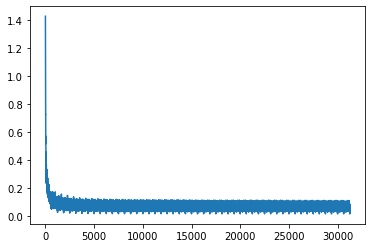

In [7]:
plt.plot(training_loss)

In [8]:
batch = 3

true_imgs, true_labels = test_dset[batch]
labels = true_labels.data.argmax(axis=1)
preds = model(true_imgs)
preds_labels = preds.data.argmax(axis=1)

In [9]:
true_labels.data

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [10]:
labels

array([3, 1, 3, 4, 7, 2, 7, 1, 2, 1])

In [11]:
preds.data

array([[1.98344560e-03, 1.56173809e-03, 1.37842333e-04, 9.03791249e-01,
        5.08244593e-05, 6.20439798e-02, 2.93761317e-04, 2.14491617e-02,
        3.50793917e-03, 5.22115007e-02],
       [1.46295037e-03, 9.09633398e-01, 6.79431576e-03, 6.27538115e-02,
        1.34005444e-02, 4.43685390e-02, 1.41178947e-02, 2.22509317e-02,
        3.53669003e-02, 8.88001174e-02],
       [9.05444787e-04, 2.85457610e-03, 1.12239039e-03, 9.35648203e-01,
        1.11773156e-03, 2.11703673e-01, 2.31155544e-04, 5.87973220e-04,
        9.56869591e-03, 1.16224389e-03],
       [3.24854195e-01, 5.30540070e-04, 1.41058639e-01, 7.14496709e-05,
        2.68374324e-01, 3.88298626e-03, 3.98942232e-01, 1.96348643e-04,
        2.54114792e-02, 2.83844420e-03],
       [1.92458581e-04, 4.52005974e-04, 5.68199530e-02, 2.06420366e-02,
        7.61437928e-04, 2.45074189e-04, 1.00567686e-05, 9.26497340e-01,
        8.02965090e-03, 5.29700611e-03],
       [4.90545668e-03, 4.80249524e-03, 9.63730156e-01, 9.25634708e-03,
   

In [12]:
preds_labels

array([3, 1, 3, 6, 7, 2, 7, 1, 2, 1])

In [13]:
labels

array([3, 1, 3, 4, 7, 2, 7, 1, 2, 1])

In [14]:
(preds_labels == labels).astype(np.uint8)

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1], dtype=uint8)